导入所需包

In [2]:
import numpy as np
import pandas as pd
import os
import xgboost as xgb

导入数据集

In [3]:
train_labels = pd.read_csv('input/train_labels.csv')
train_sequences = pd.read_csv('input/train_sequences.csv')
test_sequences = pd.read_csv('input/test_sequences.csv')
valid_labels = pd.read_csv('input/validation_labels.csv')
valid_sequences = pd.read_csv('input/validation_sequences.csv')
submission = pd.read_csv('input/sample_submission.csv')

In [4]:
train_labels.head()

,ID,resname,resid,x_1,y_1,z_1
0,1SCL_A_1,G,1,13.760,-25.974001,0.102
1,1SCL_A_2,G,2,9.310,-29.638000,2.669
2,1SCL_A_3,G,3,5.529,-27.813000,5.878
3,1SCL_A_4,U,4,2.678,-24.900999,9.793
4,1SCL_A_5,G,5,1.827,-20.136000,11.793


In [5]:
train_sequences.head()

,target_id,sequence,temporal_cutoff,description,all_sequences
0,1SCL_A,GGGUGCUCAGUACGAGAGGAACCGCACCC,1995-01-26,"THE SARCIN-RICIN LOOP, A MODULAR RNA",>1SCL_1|Chain A|RNA SARCIN-RICIN LOOP|Rattus n...
1,1RNK_A,GGCGCAGUGGGCUAGCGCCACUCAAAAGGCCCAU,1995-02-27,THE STRUCTURE OF AN RNA PSEUDOKNOT THAT CAUSES...,>1RNK_1|Chain A|RNA PSEUDOKNOT|null\nGGCGCAGUG...
2,1RHT_A,GGGACUGACGAUCACGCAGUCUAU,1995-06-03,24-MER RNA HAIRPIN COAT PROTEIN BINDING SITE F...,>1RHT_1|Chain A|RNA (5'-R(P*GP*GP*GP*AP*CP*UP*...
3,1HLX_A,GGGAUAACUUCGGUUGUCCC,1995-09-15,P1 HELIX NUCLEIC ACIDS (DNA/RNA) RIBONUCLEIC ACID,>1HLX_1|Chain A|RNA (5'-R(*GP*GP*GP*AP*UP*AP*A...
4,1HMH_E,GGCGACCCUGAUGAGGCCGAAAGGCCGAAACCGU,1995-12-07,THREE-DIMENSIONAL STRUCTURE OF A HAMMERHEAD RI...,">1HMH_1|Chains A, C, E|HAMMERHEAD RIBOZYME-RNA..."


In [6]:
test_sequences.head()

,target_id,sequence,temporal_cutoff,description,all_sequences
0,R1107,GGGGGCCACAGCAGAAGCGUUCACGUCGCAGCCCCUGUCAGCCAUU...,2022-05-28,CPEB3 ribozyme\nHuman\nhuman CPEB3 HDV-like ri...,>7QR4_1|Chain A|U1 small nuclear ribonucleopro...
1,R1108,GGGGGCCACAGCAGAAGCGUUCACGUCGCGGCCCCUGUCAGCCAUU...,2022-05-27,CPEB3 ribozyme\nChimpanzee\nChimpanzee CPEB3 H...,">7QR3_1|Chains A, B|U1 small nuclear ribonucle..."
2,R1116,CGCCCGGAUAGCUCAGUCGGUAGAGCAGCGGCUAAAACAGCUCUGG...,2022-06-04,Cloverleaf RNA\nPoliovirus\nCrystal Structure ...,">8S95_1|Chain A[auth C]|Lysine tRNA scaffold,P..."
3,R1117v2,UUGGGUUCCCUCACCCCAAUCAUAAAAAGG,2022-06-03,PreQ1 class I type III riboswitch\nK. pneumoni...,">8FZA_1|Chains A, B|PreQ1 Riboswitch (30-MER)|..."
4,R1126,GGAAUCUCGCCCGAUGUUCGCAUCGGGAUUUGCAGGUCCAUGGAUU...,2022-06-11,Traptamer\nSynthetic\nAdditional Information: ...,>8TVZ_1|Chain A[auth C]|RNA (363-MER)|syntheti...


In [7]:
valid_labels.head()

,ID,resname,resid,x_1,y_1,z_1,x_2,y_2,z_2,x_3,...,z_37,x_38,y_38,z_38,x_39,y_39,z_39,x_40,y_40,z_40
0,R1107_1,G,1,-5.499,8.520000,8.605000,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,...,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18
1,R1107_2,G,2,-5.826,10.453000,14.010000,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,...,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18
2,R1107_3,G,3,-5.849,14.768000,17.584999,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,...,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18
3,R1107_4,G,4,-5.784,19.985001,18.666000,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,...,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18
4,R1107_5,G,5,-5.755,25.533001,17.132999,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,...,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18


In [8]:
valid_sequences.head()

,target_id,sequence,temporal_cutoff,description,all_sequences
0,R1107,GGGGGCCACAGCAGAAGCGUUCACGUCGCAGCCCCUGUCAGCCAUU...,2022-05-28,CPEB3 ribozyme\nHuman\nhuman CPEB3 HDV-like ri...,>7QR4_1|Chain A|U1 small nuclear ribonucleopro...
1,R1108,GGGGGCCACAGCAGAAGCGUUCACGUCGCGGCCCCUGUCAGCCAUU...,2022-05-27,CPEB3 ribozyme\nChimpanzee\nChimpanzee CPEB3 H...,">7QR3_1|Chains A, B|U1 small nuclear ribonucle..."
2,R1116,CGCCCGGAUAGCUCAGUCGGUAGAGCAGCGGCUAAAACAGCUCUGG...,2022-06-04,Cloverleaf RNA\nPoliovirus\nCrystal Structure ...,">8S95_1|Chain A[auth C]|Lysine tRNA scaffold,P..."
3,R1117v2,UUGGGUUCCCUCACCCCAAUCAUAAAAAGG,2022-06-03,PreQ1 class I type III riboswitch\nK. pneumoni...,">8FZA_1|Chains A, B|PreQ1 Riboswitch (30-MER)|..."
4,R1126,GGAAUCUCGCCCGAUGUUCGCAUCGGGAUUUGCAGGUCCAUGGAUU...,2022-06-11,Traptamer\nSynthetic\nAdditional Information: ...,>8TVZ_1|Chain A[auth C]|RNA (363-MER)|syntheti...


数据处理

In [9]:
# rsplit从右边开始分割，n=1表示分割一次
train_labels['target'] = train_labels['ID'].str.rsplit('_', n=1).str[0]
valid_labels['target'] = valid_labels['ID'].str.rsplit('_', n=1).str[0]
# 左表的target_id和右表的target同样是rna的名称，列名不同
train = train_sequences.merge(train_labels, how='left', left_on='target_id', right_on='target')
valid = valid_sequences.merge(valid_labels, how='left', left_on='target_id', right_on='target')
# 日期转成从1970年1月1日开始的毫秒数
train['temporal_cutoff'] = pd.to_datetime(train['temporal_cutoff']).astype('int64')
valid['temporal_cutoff'] = pd.to_datetime(valid['temporal_cutoff']).astype('int64') 
test_sequences['temporal_cutoff'] = pd.to_datetime(test_sequences['temporal_cutoff']).astype('int64') 

In [10]:
submission['target'] = submission['ID'].str.rsplit('_', n=1).str[0]

In [11]:
test = test_sequences.merge(submission, how='left', left_on='target_id', right_on='target')
test['temporal_cutoff'] = pd.to_datetime(test['temporal_cutoff']).astype('int64')

In [12]:
# 生成序列的长度
train['seq_length'] = train['sequence'].str.len()
valid['seq_length'] = valid['sequence'].str.len()
test['seq_length'] = test['sequence'].str.len()
train.head()

,target_id,sequence,temporal_cutoff,description,all_sequences,ID,resname,resid,x_1,y_1,z_1,target,seq_length
0,1SCL_A,GGGUGCUCAGUACGAGAGGAACCGCACCC,791078400000000000,"THE SARCIN-RICIN LOOP, A MODULAR RNA",>1SCL_1|Chain A|RNA SARCIN-RICIN LOOP|Rattus n...,1SCL_A_1,G,1,13.760,-25.974001,0.102,1SCL_A,29
1,1SCL_A,GGGUGCUCAGUACGAGAGGAACCGCACCC,791078400000000000,"THE SARCIN-RICIN LOOP, A MODULAR RNA",>1SCL_1|Chain A|RNA SARCIN-RICIN LOOP|Rattus n...,1SCL_A_2,G,2,9.310,-29.638000,2.669,1SCL_A,29
2,1SCL_A,GGGUGCUCAGUACGAGAGGAACCGCACCC,791078400000000000,"THE SARCIN-RICIN LOOP, A MODULAR RNA",>1SCL_1|Chain A|RNA SARCIN-RICIN LOOP|Rattus n...,1SCL_A_3,G,3,5.529,-27.813000,5.878,1SCL_A,29
3,1SCL_A,GGGUGCUCAGUACGAGAGGAACCGCACCC,791078400000000000,"THE SARCIN-RICIN LOOP, A MODULAR RNA",>1SCL_1|Chain A|RNA SARCIN-RICIN LOOP|Rattus n...,1SCL_A_4,U,4,2.678,-24.900999,9.793,1SCL_A,29
4,1SCL_A,GGGUGCUCAGUACGAGAGGAACCGCACCC,791078400000000000,"THE SARCIN-RICIN LOOP, A MODULAR RNA",>1SCL_1|Chain A|RNA SARCIN-RICIN LOOP|Rattus n...,1SCL_A_5,G,5,1.827,-20.136000,11.793,1SCL_A,29


In [13]:
# 生成各残基占比
# res_name = ['A', 'C', 'G', 'U','AC','AG','AU','CG','CU','GU','AA','CC','GG','UU','CA','GA','GC','UA','UC','UG']
# for res in res_name:
#     train[res+'_percent'] = train['sequence'].str.count(res) / train['seq_length'] if len(res) ==1 else train['sequence'].str.count(res)*2 / train['seq_length']
#     valid[res+'_percent'] = valid['sequence'].str.count(res) / valid['seq_length'] if len(res) ==1 else train['sequence'].str.count(res)*2 / train['seq_length']
#     test[res+'_percent'] = test['sequence'].str.count(res) / test['seq_length'] if len(res) ==1 else train['sequence'].str.count(res)*2 / train['seq_length']


In [14]:
# 生成前后残基，按rna分组再shift
dataframes = [train, valid, test]
shifts = {
    'prev_res': 1,       # 前一个残基
    'next_res': -1,      # 后一个残基
    'prev_two_res': 2,   # 前两个残基
    'next_two_res': -2   # 后两个残基
}

# 为每个数据框添加所有残基特征
for df in dataframes:
    for col_name, shift_value in shifts.items():
        df[col_name] = df.groupby('target_id')['resname'].shift(shift_value)

# 可选：填充边界值的NaN
for df in dataframes:
    for col in shifts.keys():
        df[col] = df[col].fillna('None')  # 或使用其他合适的填充值

In [15]:
categorical_columns = ['ID', 'target_id', 'description','all_sequences','sequence','target','resname','prev_res','next_res','prev_two_res','next_two_res']    

配置编码器

In [16]:
from sklearn.preprocessing import LabelEncoder
# 储存编码器
label_encoders = {}

for col in categorical_columns:
    train[col] = train[col].astype(str).fillna('NA')

    # 初始化编码器
    le = LabelEncoder()
    # 训练编码器
    train[col] = le.fit_transform(train[col])
    # 保存编码器
    label_encoders[col] = le

for col in categorical_columns:
    valid[col] = valid[col].astype(str).fillna('NA')
    
    le = LabelEncoder()
    valid[col] = le.fit_transform(valid[col])
    label_encoders[col] = le

for col in categorical_columns:
    test[col] = test[col].astype(str).fillna('missing')
    
    le = LabelEncoder()
    test[col] = le.fit_transform(test[col])
    label_encoders[col] = le

train.head()

,target_id,sequence,temporal_cutoff,description,all_sequences,ID,resname,resid,x_1,y_1,z_1,target,seq_length,prev_res,next_res,prev_two_res,next_two_res
0,134,602,791078400000000000,634,131,5443,3,1,13.760,-25.974001,0.102,134,29,4,3,4,3
1,134,602,791078400000000000,634,131,5454,3,2,9.310,-29.638000,2.669,134,29,3,3,4,5
2,134,602,791078400000000000,634,131,5465,3,3,5.529,-27.813000,5.878,134,29,3,5,3,3
3,134,602,791078400000000000,634,131,5466,4,4,2.678,-24.900999,9.793,134,29,3,3,3,2
4,134,602,791078400000000000,634,131,5467,3,5,1.827,-20.136000,11.793,134,29,5,2,3,5


定义训练集和训练目标

In [17]:
features = ['temporal_cutoff', 'resname', 'resid', 'seq_length', 'target_id','ID','description','all_sequences','prev_res','next_res','prev_two_res','next_two_res']
coord_targets = ['x_1','y_1','z_1']

配置训练模型

In [18]:
models = {}
for coord in coord_targets:
    print(f'Training model for {coord}...')
    model = xgb.XGBRegressor(
        objective='reg:squarederror',
        n_estimators=500,  #1000棵决策树
        max_depth=5,    #最大树深
        learning_rate=0.2,  #学习率
        subsample=0.6,  #随机取样比例
        colsample_bytree=0.6,   #列采样比例
        min_child_weight=3
    )
    
    # 缺失值填充
    mean_val = train[coord].mean()
    # valid_idx是coord列不为空的行，只用它们训练
    valid_idx = train[coord].notna()
    # 用均值填充缺失值（实则没什么用，毕竟都没用上）
    train[coord].fillna(mean_val, inplace=True)
    # 训练模型
    model.fit(train[valid_idx][features], train[valid_idx][coord])
    # 保存模型
    models[coord] = model

Training model for x_1...


C:\Windows\Temp\ipykernel_9764\1028711242.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train[coord].fillna(mean_val, inplace=True)


Training model for y_1...


C:\Windows\Temp\ipykernel_9764\1028711242.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train[coord].fillna(mean_val, inplace=True)


Training model for z_1...


C:\Windows\Temp\ipykernel_9764\1028711242.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train[coord].fillna(mean_val, inplace=True)


验证模型

In [19]:
valid = valid[['temporal_cutoff', 'resname', 'resid', 'seq_length', 'target_id','ID','description','all_sequences','prev_res','next_res','prev_two_res','next_two_res'] +['x_1','y_1','z_1']]
valid.head()

,temporal_cutoff,resname,resid,seq_length,target_id,ID,description,all_sequences,prev_res,next_res,prev_two_res,next_two_res,x_1,y_1,z_1
0,1653696000000000000,2,1,69,0,0,7,2,3,2,3,2,-5.499,8.520000,8.605000
1,1653696000000000000,2,2,69,0,11,7,2,2,2,3,2,-5.826,10.453000,14.010000
2,1653696000000000000,2,3,69,0,22,7,2,2,2,2,2,-5.849,14.768000,17.584999
3,1653696000000000000,2,4,69,0,33,7,2,2,2,2,1,-5.784,19.985001,18.666000
4,1653696000000000000,2,5,69,0,44,7,2,2,1,2,1,-5.755,25.533001,17.132999


In [20]:
valid_prediction = valid.copy()
for coord in coord_targets:
    valid_prediction[coord] = models[coord].predict(valid[features])
valid_prediction

,temporal_cutoff,resname,resid,seq_length,target_id,ID,description,all_sequences,prev_res,next_res,prev_two_res,next_two_res,x_1,y_1,z_1
0,1653696000000000000,2,1,69,0,0,7,2,3,2,3,2,2.920886,10.339906,21.952251
1,1653696000000000000,2,2,69,0,11,7,2,2,2,3,2,1.069991,9.819963,27.278309
2,1653696000000000000,2,3,69,0,22,7,2,2,2,2,2,0.080248,7.078729,28.038280
3,1653696000000000000,2,4,69,0,33,7,2,2,2,2,1,0.662478,-0.375135,30.160948
4,1653696000000000000,2,5,69,0,44,7,2,2,1,2,1,9.703056,-0.571414,36.307144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2510,1660176000000000000,3,114,118,11,2414,2,3,1,4,1,4,-36.642929,8.584952,71.006081
2511,1660176000000000000,3,115,118,11,2415,2,3,4,4,1,4,-28.336916,5.306470,77.893303
2512,1660176000000000000,3,116,118,11,2416,2,3,4,4,4,4,-25.666979,7.111183,82.561279
2513,1660176000000000000,3,117,118,11,2417,2,3,4,4,4,3,-24.473866,8.859312,75.667503


In [21]:
def calculate_d0(seq_len):
    if seq_len > 30:
        return 0.6*(seq_len-0.5)**0.5-2.5
    else:
        if seq_len < 12:
            return 0.3
        if seq_len < 16:
            return 0.4
        if seq_len < 20:
            return 0.5
        if seq_len < 24:
            return 0.6
        else:   
            return 0.7

In [22]:
def calculate_dis(x1, y1, z1, x2, y2, z2):
    return ((x1-x2)**2+(y1-y2)**2+(z1-z2)**2)**0.5

In [23]:
def calculate_tm_score(pred, target):
    tm_score = []
    cur_id = ''
    for i in range(len(pred)):
        if pred['target_id'][i] != cur_id:
            if cur_id != '':
                tm_score.append(cur_id_score/seq_len)
            seq_len = pred['seq_length'][i]
            d0=calculate_d0(seq_len)
            cur_id_score = (1/(1+(calculate_dis(pred['x_1'][i],pred['y_1'][i],pred['z_1'][i],target['x_1'][i],target['y_1'][i],target['z_1'][i]))**2/d0**2))
            cur_id = pred['target_id'][i]
        else :
            if i == len(pred)-1:
                tm_score.append(cur_id_score/seq_len)
                return np.mean(tm_score)
            else:
                cur_id_score += (1/(1+(calculate_dis(pred['x_1'][i],pred['y_1'][i],pred['z_1'][i],target['x_1'][i],target['y_1'][i],target['z_1'][i]))**2/d0**2))

In [24]:
calculate_tm_score(valid, valid_prediction)

0.0035223015051328403

绘制图像

In [25]:
import matplotlib.pyplot as plt

def plot_rna(pred, target):
    # 获取第一个RNA分子的ID
    first_rna_id = pred['target_id'].unique()[0]
    rna_name = valid_sequences['target_id'].unique()[0]
    
    # 筛选出第一条RNA的所有残基并按残基ID排序
    pred_rna = pred[pred['target_id'] == first_rna_id].sort_values('resid')
    target_rna = target[target['target_id'] == first_rna_id].sort_values('resid')
    
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    # 绘制预测结构 (蓝色)
    ax.plot(pred_rna['x_1'], pred_rna['y_1'], pred_rna['z_1'], 'b-o', linewidth=2, markersize=4, label='prediction')
    
    # 绘制实际结构 (红色)
    ax.plot(target_rna['x_1'], target_rna['y_1'], target_rna['z_1'], 'r-o', linewidth=2, markersize=4, label='truth')
    
    # 设置图形标题和轴标签
    ax.set_title(f'RNA - {rna_name}', fontsize=14)
    ax.set_xlabel('X', fontsize=12)
    ax.set_ylabel('Y', fontsize=12)
    ax.set_zlabel('Z', fontsize=12)
    
    # 添加图例
    ax.legend(fontsize=12)
    
    # 调整视角以便更好地观察结构
    ax.view_init(elev=20, azim=30)
    
    # 设置坐标轴比例相等，使结构不变形
    max_range = np.array([
        max(pred_rna['x_1'].max(), target_rna['x_1'].max()) - min(pred_rna['x_1'].min(), target_rna['x_1'].min()),
        max(pred_rna['y_1'].max(), target_rna['y_1'].max()) - min(pred_rna['y_1'].min(), target_rna['y_1'].min()),
        max(pred_rna['z_1'].max(), target_rna['z_1'].max()) - min(pred_rna['z_1'].min(), target_rna['z_1'].min())
    ]).max() / 2.0
    
    # 计算预测和真实结构的中心坐标（取平均值）
    mid_x = (pred_rna['x_1'].mean() + target_rna['x_1'].mean()) / 2
    mid_y = (pred_rna['y_1'].mean() + target_rna['y_1'].mean()) / 2
    mid_z = (pred_rna['z_1'].mean() + target_rna['z_1'].mean()) / 2

    # 设置轴的显示范围，确保两个结构居中且保持相同的比例
    ax.set_xlim(mid_x - max_range, mid_x + max_range)
    ax.set_ylim(mid_y - max_range, mid_y + max_range)
    ax.set_zlim(mid_z - max_range, mid_z + max_range)

    # 自动调整图表布局，减少边距并防止元素被截断
    plt.tight_layout()

    # 显示图表
    plt.show()


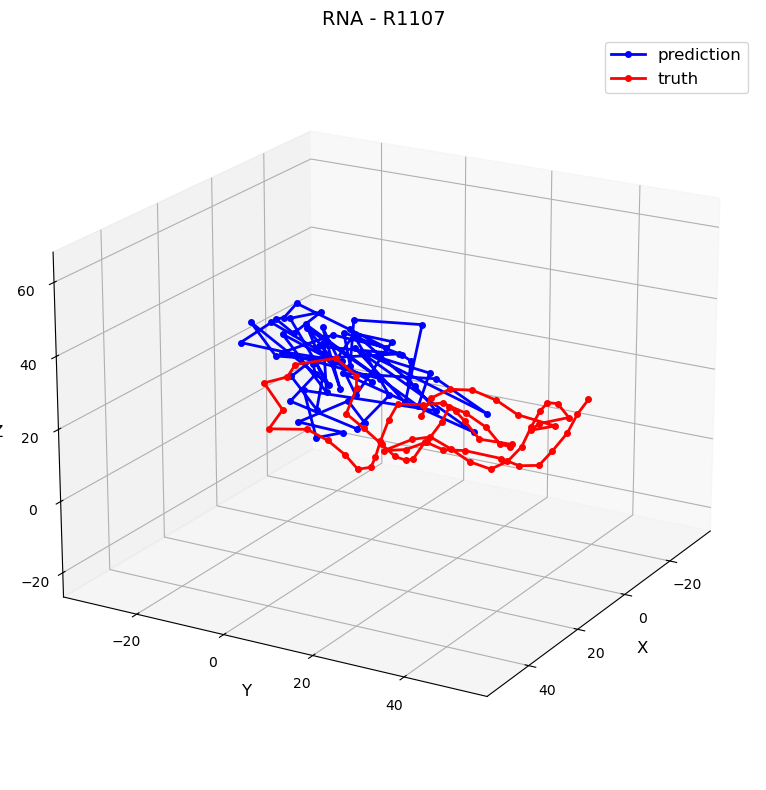

In [26]:
plot_rna(valid_prediction, valid)

测试模型

In [27]:
test = test[ ['temporal_cutoff', 'resname', 'resid', 'seq_length', 'target_id','ID','description','all_sequences','prev_res','next_res','prev_two_res','next_two_res'] ]

In [28]:
test_predictions = test.copy()
for coord in coord_targets:
    # 预测
    test_predictions[coord] = models[coord].predict(test[features])
    
# 展示部分预测
print("Test predictions sample:")
test_predictions[['ID', 'resname', 'resid', 'x_1', 'y_1', 'z_1']].head()

Test predictions sample:


,ID,resname,resid,x_1,y_1,z_1
0,0,2,1,2.920886,10.339906,21.952251
1,11,2,2,1.069991,9.819963,27.278309
2,22,2,3,0.080248,7.078729,28.038280
3,33,2,4,0.662478,-0.375135,30.160948
4,44,2,5,9.703056,-0.571414,36.307144


In [29]:
# 简单随便复制几份
for i in range(2, 6):
    test_predictions[f'x_{i}'] = test_predictions['x_1']
    test_predictions[f'y_{i}'] = test_predictions['y_1']
    test_predictions[f'z_{i}'] = test_predictions['z_1']

In [30]:
submission[['x_1','y_1','z_1','x_2','y_2','z_2','x_3','y_3','z_3','x_4','y_4','z_4','x_5','y_5','z_5']] = test_predictions[['x_1','y_1','z_1','x_2','y_2','z_2','x_3','y_3','z_3','x_4','y_4','z_4','x_5','y_5','z_5']] 

In [31]:
submission.to_csv('submission.csv', index=False)